In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
p = np.linspace(0.01,0.99,1000)

In [4]:
pd = 1 - p

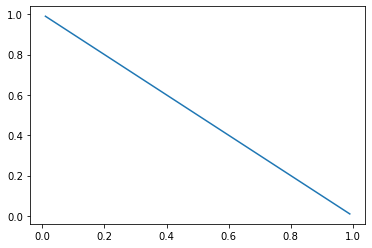

In [5]:
plt.plot(p, pd)

 # ODDS

In [7]:
odds = p / pd

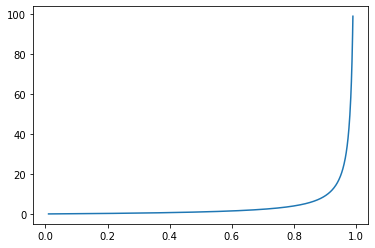

In [8]:
plt.plot(p, odds)

# Logit = Log(odds)

In [9]:
logit = np.log(odds)

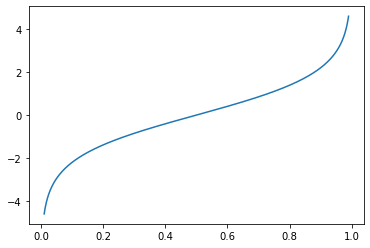

In [10]:
plt.plot(p, logit)

In [11]:
X, y = make_blobs(centers=2,random_state=42)

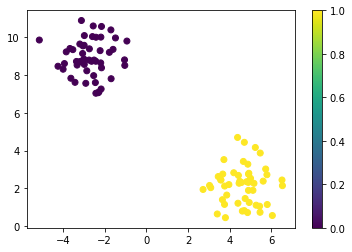

In [55]:
plt.scatter(X.T[0],X.T[1],c=y)
plt.colorbar()

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.intercept_

array([3.65752464])

In [22]:
model.coef_

array([[ 0.97796003, -0.82847741]])

In [24]:
model.predict([[0,6]])

array([0])

In [27]:
model.predict_proba([[0,6]])[0,1]

0.21192850777686204

In [28]:
model.predict([[1,6]])

array([0])

In [29]:
model.predict_proba([[1,6]])[0,1]

0.41693221482170645

In [30]:
model.predict_proba([[2,6]])[0,1]

0.6553364923566358

In [31]:
model.predict_proba([[3,6]])[0,1]

0.8348696245398477

In [45]:
def logit(X):
    # X (1x2) boyutunda bir array
    q, p = model.predict_proba(X)[0].tolist()
    return np.log(p / q)

In [46]:
logit([[1,6]])

-0.33537979499325926

In [47]:
logit([[2,6]])

0.6425802315970742

In [48]:
logit([[3,6]])

1.6205402581874073

In [49]:
logit([[4,6]])

2.5985002847777396

In [50]:
logit([[4,6]]) - logit([[3,6]])

0.9779600265903323

In [51]:
logit([[3,6]]) - logit([[2,6]])

0.9779600265903331

In [52]:
logit([[2,6]]) - logit([[1,6]])

0.9779600265903334

In [53]:
logit([[0,0]])

3.6575246391321614

In [54]:
logit([[0,1]]) - logit([[0,0]])

-0.82847741011929

In [64]:
def logit2(X):
    # q--> 0 olma ihtimali, p--> 1 olma ihtimali
    # q = model.predict_proba(X).T[0]
    # p = model.predict_proba(X).T[1]
    q, p = model.predict_proba(X).T
    return np.log(p / q)

In [69]:
yr = logit2(X)

In [70]:
model2 = LinearRegression()

In [71]:
model2.fit(X,yr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Logit kullarak katsayıların aynı olduğunu gördük

In [73]:
model2.coef_

array([ 0.97796003, -0.82847741])

In [74]:
model2.intercept_

3.657524639132149

## Logistic Regression Modeline ait fonksiyonlar ile çözüm bulduk

In [75]:
model.coef_

array([[ 0.97796003, -0.82847741]])

In [76]:
model.intercept_

array([3.65752464])

# örnek problem

In [77]:
model.predict_proba([[0,2]])

array([[0.11914311, 0.88085689]])

In [78]:
model.predict_proba([[2,2]])

array([[0.01877105, 0.98122895]])

In [79]:
logit([[2,2]]) - logit([[0,2]])

1.9559200531806717

In [80]:
0.97796003 * 2 

1.95592006

# meshgrid / contourplot

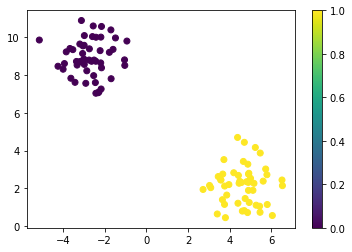

In [82]:
plt.scatter(X.T[0],X.T[1],c=y)
plt.colorbar()

# özet bir örnek

In [140]:
a = [1,2,3]
b = [4,5,6]

In [141]:
aa, bb = np.meshgrid(a,b)

In [142]:
aa

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [143]:
bb

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [144]:
cc = np.array([[4, 4, 4],
              [5, 13, 5],
              [6, 6, 6]])

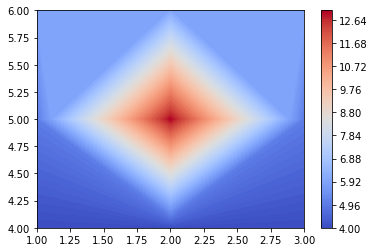

In [145]:
plt.contourf(aa,bb,cc,levels=139, cmap="coolwarm", vmin=4,vmax=13)
plt.colorbar()

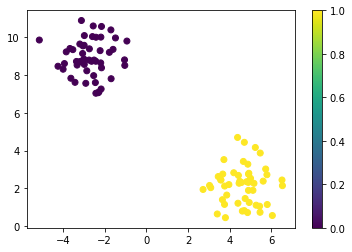

In [133]:
plt.scatter(X.T[0],X.T[1],c=y)
plt.colorbar()

In [212]:
a = np.linspace(X.T[0].min()-1,X.T[0].max()+1,100)

In [213]:
b = np.linspace(X.T[1].min()-1,X.T[1].max()+1,100)

In [214]:
aa, bb = np.meshgrid(a,b)

In [215]:
aa.reshape(-1,1)

array([[-6.12894273],
       [-5.99101336],
       [-5.85308399],
       ...,
       [ 7.250206  ],
       [ 7.38813537],
       [ 7.52606474]])

In [216]:
bb.reshape(-1,1)

array([[-0.54167754],
       [-0.54167754],
       [-0.54167754],
       ...,
       [11.86656431],
       [11.86656431],
       [11.86656431]])

In [217]:
xx = np.hstack([aa.reshape(-1,1),bb.reshape(-1,1)])

In [218]:
xx.shape

(10000, 2)

In [219]:
cc = model.predict_proba(xx)[:,1]

In [220]:
cc = cc.reshape(aa.shape)

In [221]:
cc.shape

(100, 100)

# Karar Sınırı

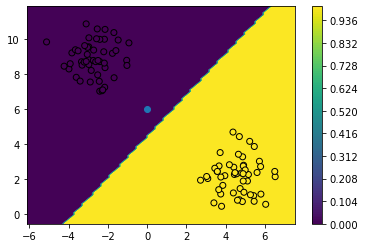

In [222]:
plt.contourf(aa,bb,cc>0.5,levels=139, cmap="viridis", vmin=0,vmax=1)
plt.colorbar()
plt.scatter(X.T[0],X.T[1],c=y, edgecolors="black")
plt.scatter(0,6) # örnek nokta

# Olasılık

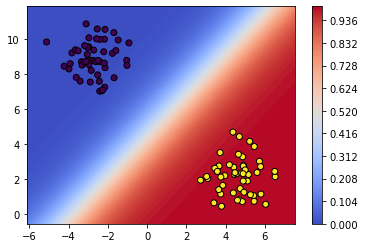

In [223]:
plt.contourf(aa,bb,cc,levels=139, cmap="coolwarm", vmin=0,vmax=1)
plt.colorbar()
plt.scatter(X.T[0],X.T[1],c=y, edgecolors="black")

# Logit

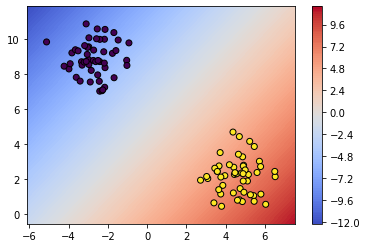

In [228]:
plt.contourf(aa,bb,np.log(cc/(1-cc)),levels=139, cmap="coolwarm")
plt.colorbar()
plt.scatter(X.T[0],X.T[1],c=y, edgecolors="black")